# Figures for Prevalence and Incidence of Parkinson's disease in UKBB vs expected

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import pylab as plt

from scipy import stats
from statannot import add_stat_annotation

from importlib import reload
import sys
import os
sys.path.insert(1,'../')
import plots

In [2]:
reload(plots)
image_path = plots.set_dir()
colors = plots.set_colors()
data_path = '/scratch/c.c21013066/data/ukbiobank/sample/withGP/IncidencePrevalence'
name = 'ParkinsonDisease'

# Prevalence

In [3]:
prevalence_age = pd.read_csv(f'{data_path}/Prevalence_ParkinsonDisease.csv',index_col=0,parse_dates=[f'{name}_date'])
expected_prev_year_all = pd.read_csv(f'{data_path}/expected_prevalence_ParkinsonDisease.csv',index_col=0,parse_dates=[f'{name}_date'])
prev_year_all = pd.read_csv(f'{data_path}/observed_prevalenceParkinsonDisease.csv',index_col=0,parse_dates=[f'{name}_date'])

In [5]:
expected_prev_year_all.iloc[60:67,:]

,cases
ParkinsonDisease_date,
2029-12-31,5280.421535
2030-12-31,5255.447070
2031-12-31,5204.334010


In [4]:
prevalence_age = prevalence_age.rename(columns={'ParkinsonDisease_agegroup':'age group','kind':' '})
prevalence_age[' '] = prevalence_age[' '].replace(['cases_observed','cases_expected'],['observed cases','expected cases'])

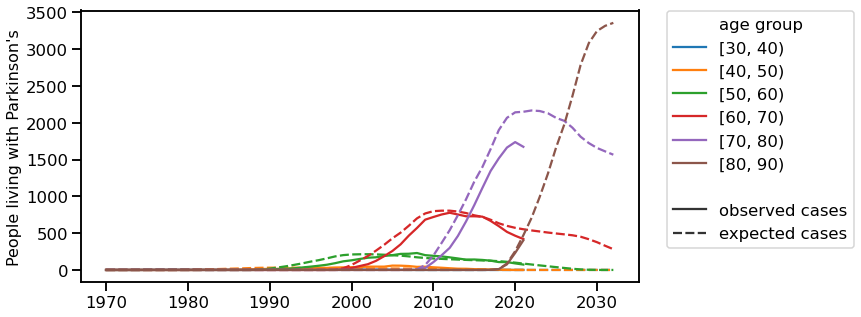

In [5]:
fig = plt.figure(figsize=(10,5))
plots.plot_context()
sns.lineplot(x=f'{name}_date',y='cases',hue=f'age group',data=prevalence_age,style=' ');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("People living with Parkinson's")
plt.xlabel('')
plt.savefig(f'{image_path}/prevalence_years_agegroups.pdf',dpi=300,bbox_inches='tight')
plt.savefig(f'{image_path}/prevalence_years_agegroups.png',dpi=300,bbox_inches='tight')

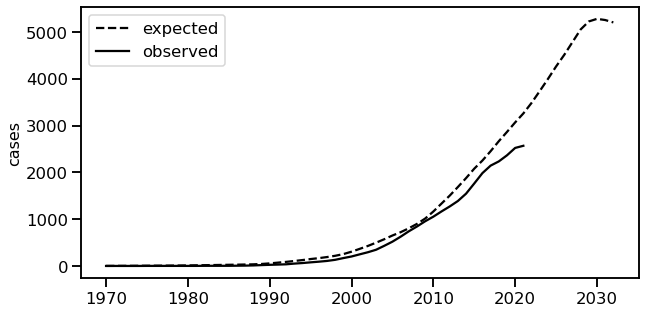

In [6]:
fig = plt.figure(figsize=(10,5))
plots.plot_context()

ax = sns.lineplot(x=f'{name}_date',y='cases',data=expected_prev_year_all.reset_index(),label='expected',linestyle='--',color='k');
sns.lineplot(x=f'{name}_date',y='cases',data=prev_year_all.reset_index(),label='observed',color='k');
plt.xlabel('')
plt.savefig(f'{image_path}/prevalence_years.pdf',dpi=300,bbox_inches='tight')
plt.savefig(f'{image_path}/prevalence_years.png',dpi=300,bbox_inches='tight')

# Incidence

In [5]:
incidence_all = pd.read_csv(f'{data_path}/Incidence_ParkinsonDisease.csv',index_col=0,parse_dates=[f'{name}_date'])
incidence_age = pd.read_csv(f'{data_path}/Incidence_age_ParkinsonDisease.csv',index_col=0)#,parse_dates=[f'{name}_date'])

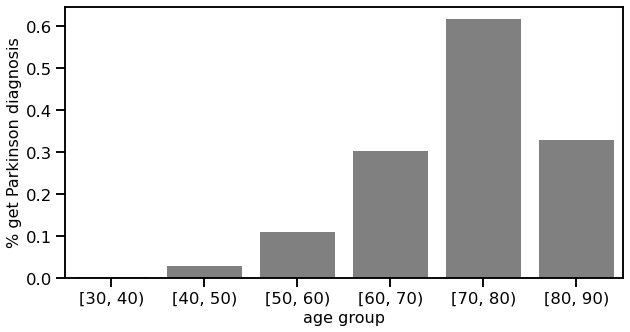

In [8]:
# for each age group: which proportion get diagnosis during that age interval?
fig = plt.figure(figsize=(10,5))
plots.plot_context()
ax = sns.barplot(x=f'{name}_agegroup',y='percent',data=incidence_age.reset_index(),color='gray')
ax.set_xlabel('age group')
ax.set_ylabel('% get Parkinson diagnosis')
plt.savefig(f'{image_path}/diagnosis_age_incidence.pdf',dpi=300,bbox_inches='tight')
plt.savefig(f'{image_path}/diagnosis_age_incidence.png',dpi=300,bbox_inches='tight')

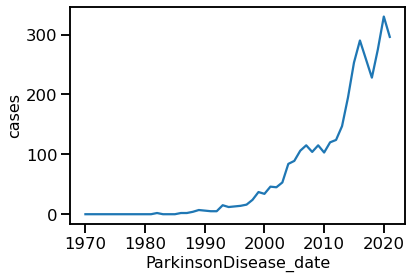

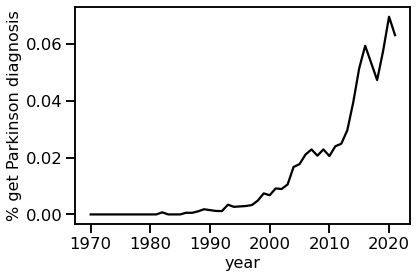

In [9]:
sns.lineplot(data=incidence_all.reset_index(),x=f'{name}_date',y='cases')
plt.show()

plots.plot_context()
ax = sns.lineplot(data=incidence_all.reset_index(),x=f'{name}_date',y='percent',color='k')
ax.set_ylabel('% get Parkinson diagnosis')
ax.set_xlabel('year')
plt.savefig(f'{image_path}/incidence_year.pdf',dpi=300,bbox_inches='tight')
plt.savefig(f'{image_path}/incidence_year.png',dpi=300,bbox_inches='tight')

# Combined supplemental figure

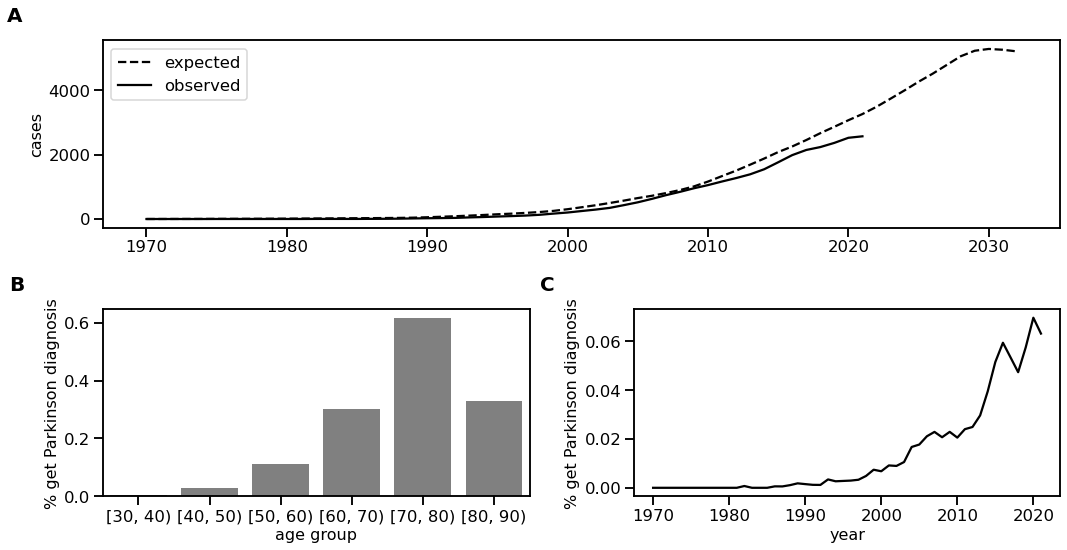

In [25]:
# combined subplots
fig,axes = plt.subplot_mosaic([['upper', 'upper'],
                               ['lower left', 'lower right']],
                              figsize=(15, 8))
plots.plot_context()
ax1 = sns.lineplot(x=f'{name}_date',y='cases',data=expected_prev_year_all.reset_index(),label='expected',
                  linestyle='--',color='k',ax=axes['upper']);
sns.lineplot(x=f'{name}_date',y='cases',data=prev_year_all.reset_index(),label='observed',color='k',ax=axes['upper']);
ax1.set_xlabel('')
ax1.text(-0.1, 1.1,"A", transform=ax1.transAxes,size=20, weight='bold')

ax2 = sns.barplot(x=f'{name}_agegroup',y='percent',data=incidence_age.reset_index(),color='gray',ax=axes['lower left'])
ax2.set_xlabel('age group')
ax2.set_ylabel('% get Parkinson diagnosis')
ax2.text(-0.22, 1.1,"B", transform=ax2.transAxes,size=20, weight='bold')

ax3 = sns.lineplot(data=incidence_all.reset_index(),x=f'{name}_date',y='percent',color='k',ax=axes['lower right'])
ax3.set_ylabel('% get Parkinson diagnosis')
ax3.set_xlabel('year')
ax3.text(-0.22, 1.1,"C", transform=ax3.transAxes,size=20, weight='bold')

plt.tight_layout()
plt.savefig(f'{image_path}/prevalence_incidence.pdf',dpi=300,bbox_inches='tight')
plt.savefig(f'{image_path}/prevalence_incidence.png',dpi=300,bbox_inches='tight')